In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

## Exploring data

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preparing data for Keras and TensorFlow

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [7]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


## 1. Build an unregularized neural network model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

### Compile the model


In [11]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

### Fit the model to the training data

In [12]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 2s - loss: 1.0603 - accuracy: 0.4889 - val_loss: 0.9579 - val_accuracy: 0.6333
Epoch 2/200
3/3 - 0s - loss: 0.9373 - accuracy: 0.6556 - val_loss: 0.8274 - val_accuracy: 0.6333
Epoch 3/200
3/3 - 0s - loss: 0.8026 - accuracy: 0.6778 - val_loss: 0.6693 - val_accuracy: 0.9000
Epoch 4/200
3/3 - 0s - loss: 0.6462 - accuracy: 0.8222 - val_loss: 0.5168 - val_accuracy: 0.9667
Epoch 5/200
3/3 - 0s - loss: 0.5056 - accuracy: 0.8222 - val_loss: 0.4366 - val_accuracy: 0.9333
Epoch 6/200
3/3 - 0s - loss: 0.4187 - accuracy: 0.9111 - val_loss: 0.3224 - val_accuracy: 1.0000
Epoch 7/200
3/3 - 0s - loss: 0.3318 - accuracy: 0.9444 - val_loss: 0.2525 - val_accuracy: 1.0000
Epoch 8/200
3/3 - 0s - loss: 0.2720 - accuracy: 0.9333 - val_loss: 0.2060 - val_accuracy: 1.0000
Epoch 9/200
3/3 - 0s - loss: 0.2339 - accuracy: 0.9444 - val_loss: 0.1326 - val_accuracy: 1.0000
Epoch 10/200
3/3 - 0s - loss: 0.1778 - accuracy: 0.9556 - val_loss: 0.1449 - val_accuracy: 0.9333
Epoch 11/200
3/3 - 0s - loss:

Epoch 85/200
3/3 - 0s - loss: 0.1301 - accuracy: 0.9333 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 86/200
3/3 - 0s - loss: 0.0847 - accuracy: 0.9667 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 87/200
3/3 - 0s - loss: 0.1099 - accuracy: 0.9333 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 88/200
3/3 - 0s - loss: 0.0893 - accuracy: 0.9778 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 89/200
3/3 - 0s - loss: 0.1255 - accuracy: 0.9444 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 90/200
3/3 - 0s - loss: 0.0970 - accuracy: 0.9556 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 91/200
3/3 - 0s - loss: 0.1352 - accuracy: 0.9333 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 92/200
3/3 - 0s - loss: 0.0891 - accuracy: 0.9556 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 93/200
3/3 - 0s - loss: 0.0880 - accuracy: 0.9667 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 94/200
3/3 - 0s - loss: 0.1075 - accuracy: 0.9333 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 95/200
3/3 - 0

Epoch 168/200
3/3 - 0s - loss: 0.0786 - accuracy: 0.9667 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 169/200
3/3 - 0s - loss: 0.1021 - accuracy: 0.9444 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 170/200
3/3 - 0s - loss: 0.1107 - accuracy: 0.9444 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 171/200
3/3 - 0s - loss: 0.1267 - accuracy: 0.9444 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 172/200
3/3 - 0s - loss: 0.1071 - accuracy: 0.9667 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 173/200
3/3 - 0s - loss: 0.1002 - accuracy: 0.9778 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 174/200
3/3 - 0s - loss: 0.1957 - accuracy: 0.9333 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 175/200
3/3 - 0s - loss: 0.0688 - accuracy: 0.9889 - val_loss: 0.0611 - val_accuracy: 1.0000
Epoch 176/200
3/3 - 0s - loss: 0.1547 - accuracy: 0.9222 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 177/200
3/3 - 0s - loss: 0.0883 - accuracy: 0.9444 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 178/

### Model Evaluation

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

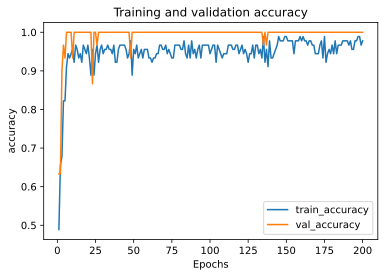

In [14]:
plot_metric(history, 'accuracy')

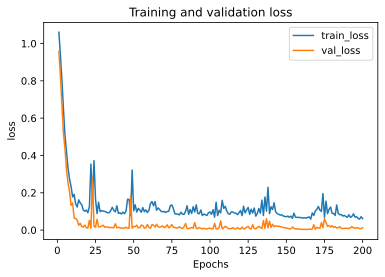

In [15]:
plot_metric(history, 'loss')

Plot the training and validation loss

Finally, let's plot the loss vs. epochs graph on the training and validation sets

**From the graph, we can see that the model has vastly overfit the training data, so it outperform the validation set**


In [16]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1565 - accuracy: 0.9333


[0.1565190702676773, 0.9333333373069763]

## 2. Adding L2 regularization and Dropout

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [18]:
# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-5, 0.3)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                320       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

In [20]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [21]:
# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.2305 - accuracy: 0.3222 - val_loss: 1.0789 - val_accuracy: 0.3667
Epoch 2/200
3/3 - 0s - loss: 1.2181 - accuracy: 0.2556 - val_loss: 1.0935 - val_accuracy: 0.5000
Epoch 3/200
3/3 - 0s - loss: 1.1215 - accuracy: 0.3667 - val_loss: 1.1077 - val_accuracy: 0.3000
Epoch 4/200
3/3 - 0s - loss: 1.0734 - accuracy: 0.3778 - val_loss: 1.1086 - val_accuracy: 0.3000
Epoch 5/200
3/3 - 0s - loss: 1.1246 - accuracy: 0.3556 - val_loss: 1.1067 - val_accuracy: 0.3000
Epoch 6/200
3/3 - 0s - loss: 1.0899 - accuracy: 0.4000 - val_loss: 1.0980 - val_accuracy: 0.6333
Epoch 7/200
3/3 - 0s - loss: 1.1015 - accuracy: 0.4111 - val_loss: 1.0980 - val_accuracy: 0.6333
Epoch 8/200
3/3 - 0s - loss: 1.0928 - accuracy: 0.4000 - val_loss: 1.0937 - val_accuracy: 0.6333
Epoch 9/200
3/3 - 0s - loss: 1.1315 - accuracy: 0.3000 - val_loss: 1.0927 - val_accuracy: 0.6333
Epoch 10/200
3/3 - 0s - loss: 1.1103 - accuracy: 0.3222 - val_loss: 1.0946 - val_accuracy: 0.6333
Epoch 11/200
3/3 - 0s - loss:

Epoch 85/200
3/3 - 0s - loss: 0.4412 - accuracy: 0.7222 - val_loss: 0.4984 - val_accuracy: 0.7000
Epoch 86/200
3/3 - 0s - loss: 0.4308 - accuracy: 0.8111 - val_loss: 0.4992 - val_accuracy: 0.6667
Epoch 87/200
3/3 - 0s - loss: 0.4817 - accuracy: 0.6889 - val_loss: 0.4948 - val_accuracy: 0.7667
Epoch 88/200
3/3 - 0s - loss: 0.4216 - accuracy: 0.7222 - val_loss: 0.4892 - val_accuracy: 0.9667
Epoch 89/200
3/3 - 0s - loss: 0.4205 - accuracy: 0.8000 - val_loss: 0.4791 - val_accuracy: 1.0000
Epoch 90/200
3/3 - 0s - loss: 0.4490 - accuracy: 0.7667 - val_loss: 0.4710 - val_accuracy: 0.7333
Epoch 91/200
3/3 - 0s - loss: 0.4931 - accuracy: 0.7000 - val_loss: 0.4692 - val_accuracy: 0.6667
Epoch 92/200
3/3 - 0s - loss: 0.5010 - accuracy: 0.7222 - val_loss: 0.4715 - val_accuracy: 0.6667
Epoch 93/200
3/3 - 0s - loss: 0.4996 - accuracy: 0.7111 - val_loss: 0.4724 - val_accuracy: 0.6667
Epoch 94/200
3/3 - 0s - loss: 0.4514 - accuracy: 0.7222 - val_loss: 0.4731 - val_accuracy: 0.6667
Epoch 95/200
3/3 - 0

Epoch 168/200
3/3 - 0s - loss: 0.3499 - accuracy: 0.8111 - val_loss: 0.3367 - val_accuracy: 1.0000
Epoch 169/200
3/3 - 0s - loss: 0.3583 - accuracy: 0.8667 - val_loss: 0.3422 - val_accuracy: 0.9667
Epoch 170/200
3/3 - 0s - loss: 0.3613 - accuracy: 0.8778 - val_loss: 0.3115 - val_accuracy: 1.0000
Epoch 171/200
3/3 - 0s - loss: 0.3603 - accuracy: 0.8556 - val_loss: 0.2951 - val_accuracy: 1.0000
Epoch 172/200
3/3 - 0s - loss: 0.3385 - accuracy: 0.9000 - val_loss: 0.2992 - val_accuracy: 1.0000
Epoch 173/200
3/3 - 0s - loss: 0.3534 - accuracy: 0.8889 - val_loss: 0.2731 - val_accuracy: 1.0000
Epoch 174/200
3/3 - 0s - loss: 0.3864 - accuracy: 0.8444 - val_loss: 0.2496 - val_accuracy: 1.0000
Epoch 175/200
3/3 - 0s - loss: 0.4382 - accuracy: 0.8111 - val_loss: 0.2501 - val_accuracy: 1.0000
Epoch 176/200
3/3 - 0s - loss: 0.3263 - accuracy: 0.8667 - val_loss: 0.2542 - val_accuracy: 1.0000
Epoch 177/200
3/3 - 0s - loss: 0.3529 - accuracy: 0.8000 - val_loss: 0.2465 - val_accuracy: 1.0000
Epoch 178/

### Plot the learning curves

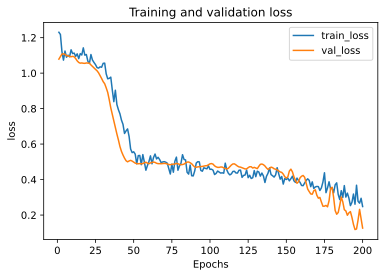

In [22]:
plot_metric(history, 'loss')

**Here, you can see that the overfitting is not completely fixed, but there is a signficant improvement when we compare it to the unregularized model**

In [55]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

30/1 - 0s - loss: 0.0602 - accuracy: 0.9667


[0.06016349419951439, 0.96666664]